# Analyse Globale des Tendances de l'Espérance de Vie : Une Approche Simplifiée
L'ensemble de données utilisé dans cette analyse provient de la plateforme Kaggle, une ressource populaire pour les données ouvertes et les compétitions de data science.

lien vers le dataset : [dataset](https://www.kaggle.com/datasets/fredericksalazar/life-expectancy-1960-to-present-global)

### Chargement des modules

In [290]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Chargement du fichier csv dans un DataFrame

In [293]:
path = 'life_expectancy_dataset.csv'
df = pd.read_csv(path, delimiter=";")
df.head()

,country_code,country_name,region,sub-region,intermediate-region,year,life_expectancy_women,life_expectancy_men
0,AFG,AFGANISTÁN,ASIA,SOUTHERN ASIA,NaN,1960,"33,28","31,87"
1,AFG,AFGANISTÁN,ASIA,SOUTHERN ASIA,NaN,1961,"33,81","32,41"
2,AFG,AFGANISTÁN,ASIA,SOUTHERN ASIA,NaN,1962,"34,30","32,88"
3,AFG,AFGANISTÁN,ASIA,SOUTHERN ASIA,NaN,1963,"34,77","33,35"
4,AFG,AFGANISTÁN,ASIA,SOUTHERN ASIA,NaN,1964,"35,25","33,83"


In [295]:
nbr_lignes = df.shape[0]
nbr_colonnes = df.shape[1]
df.shape

(13545, 8)

### Nettoyage et formatage des données

In [298]:
# Remplacement des virgules par des points dans les colonnes numériques pour la conversion en float
df['life_expectancy_women'] = df['life_expectancy_women'].str.replace(',', '.').astype(float)
df['life_expectancy_men'] = df['life_expectancy_men'].str.replace(',', '.').astype(float)

# Vérification des valeurs manquantes
missing_values = df.isnull().sum()
print(f"Nombre de valeurs manquantes : {missing_values}")

Nombre de valeurs manquantes : country_code                0
country_name                0
region                      0
sub-region                  0
intermediate-region      7875
year                        0
life_expectancy_women       0
life_expectancy_men         0
dtype: int64


In [300]:
df[['life_expectancy_women','life_expectancy_men']].describe()

,life_expectancy_women,life_expectancy_men
count,13545.000000,13545.000000
mean,64.517931,59.653992
std,17.778717,16.444545
min,0.000000,0.000000
25%,57.830000,53.850000
50%,69.590000,63.950000
75%,76.050000,69.920000
max,88.060000,83.350000


### Visualisation exploratoire

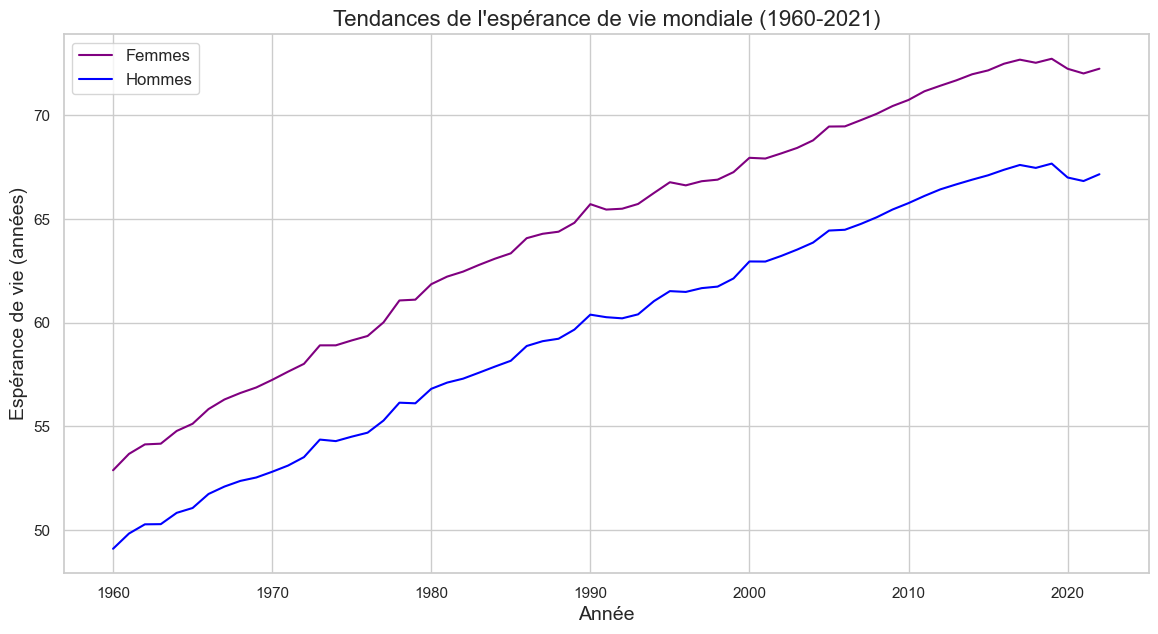

In [303]:
# Calcule de la moyenne de l'espérance de vie pour les hommes et les femmes par année
avg_life_expectancy_by_year = df.groupby('year')[['life_expectancy_women', 'life_expectancy_men']].mean()

# Courbe de tendance de l'espérance de vie au fil du temps
plt.figure(figsize=(14, 7))
plt.plot(avg_life_expectancy_by_year.index, avg_life_expectancy_by_year['life_expectancy_women'], label='Femmes', color='purple')
plt.plot(avg_life_expectancy_by_year.index, avg_life_expectancy_by_year['life_expectancy_men'], label='Hommes', color='blue')

plt.title('Tendances de l\'espérance de vie mondiale (1960-2021)', fontsize=16)
plt.xlabel('Année', fontsize=14)
plt.ylabel('Espérance de vie (années)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

plt.show()

<Figure size 1400x700 with 0 Axes>

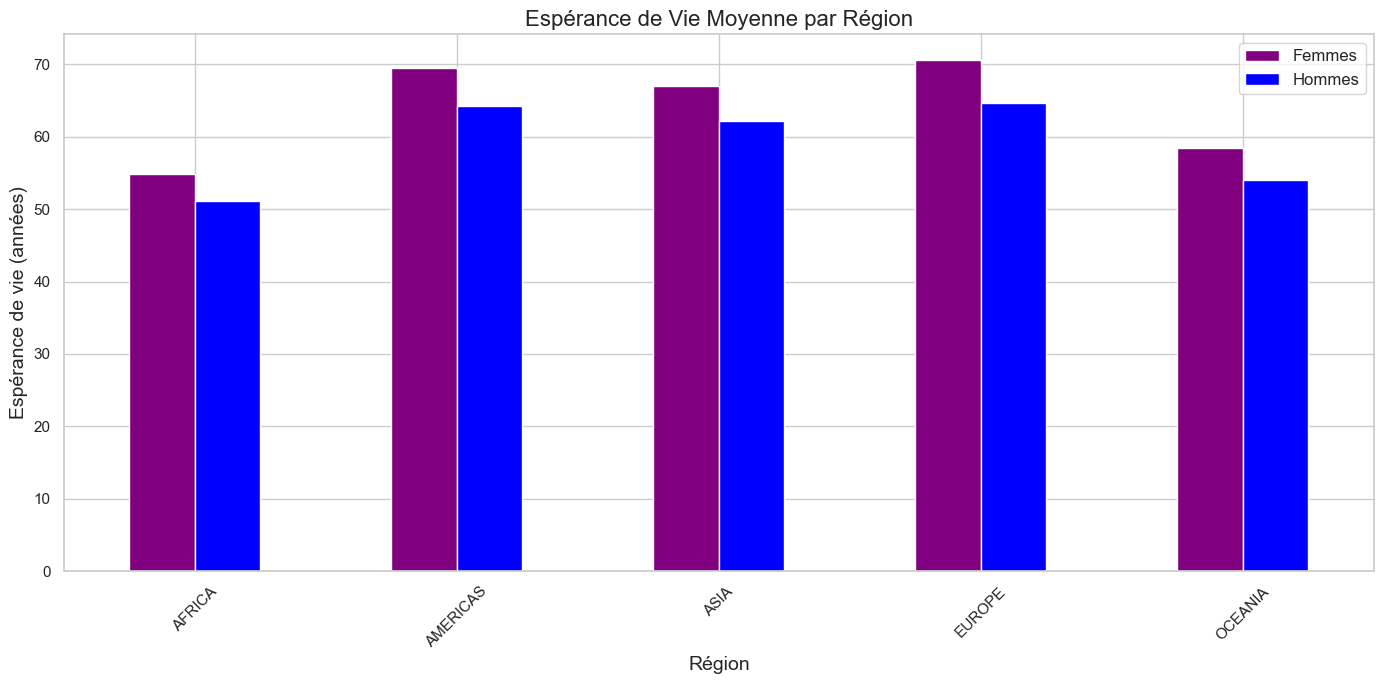

In [304]:
# Analyse par région
# Calcule de la moyenne de l'espérance de vie par région
avg_life_expectancy_by_region = df.groupby('region')[['life_expectancy_women', 'life_expectancy_men']].mean()


plt.figure(figsize=(14, 7))
avg_life_expectancy_by_region.plot(kind='bar', color=['purple', 'blue'], figsize=(14, 7))

# Ajout des titres et des labels
plt.title('Espérance de Vie Moyenne par Région', fontsize=16)
plt.xlabel('Région', fontsize=14)
plt.ylabel('Espérance de vie (années)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(['Femmes', 'Hommes'], fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

Ce graphique illustre l'espérance de vie moyenne par région pour les femmes et les hommes, mettant en évidence des disparités régionales significatives. On observe que l'Europe présente l'espérance de vie la plus élevée pour les deux sexes, ce qui pourrait être attribué à des systèmes de santé avancés et à des conditions de vie favorables. En revanche, l'Afrique montre l'espérance de vie la plus faible, soulignant des défis potentiels en matière de santé publique et de développement socio-économique.

### Modélisation

In [309]:
# Préparation des données pour la modélisation
X = avg_life_expectancy_by_year.index.values.reshape(-1, 1)
y_women = avg_life_expectancy_by_year['life_expectancy_women'].values
y_men = avg_life_expectancy_by_year['life_expectancy_men'].values

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train_women, y_test_women = train_test_split(X, y_women, test_size=0.2, random_state=42)
X_train, X_test, y_train_men, y_test_men = train_test_split(X, y_men, test_size=0.2, random_state=42)

# Création et entraînement des modèle de régression linéaire (femmes, hommes) 
model_women = LinearRegression()
model_women.fit(X_train, y_train_women)

model_men = LinearRegression()
model_men.fit(X_train, y_train_men)

LinearRegression()

### Prédiction et évaluation du modèle pour les femmes

In [312]:
y_pred_women = model_women.predict(X_test)
mse_women = mean_squared_error(y_test_women, y_pred_women)
print(f'Erreur quadratique moyenne (Femmes): {mse_women}')

Erreur quadratique moyenne (Femmes): 1.1313349149701135


### Prédiction et évaluation du modèle pour les hommes

In [315]:
y_pred_men = model_men.predict(X_test)
mse_men = mean_squared_error(y_test_men, y_pred_men)
print(f'Erreur quadratique moyenne (Hommes): {mse_men}')

Erreur quadratique moyenne (Hommes): 0.7857629474772412


### Interprétation des résultats

In [318]:
print("Interprétation des résultats :")
print(f"- L'erreur quadratique moyenne pour le modèle des femmes est de {mse_women:.2f}.")
print(f"- L'erreur quadratique moyenne pour le modèle des hommes est de {mse_men:.2f}.")
print("- Les modèles montrent une tendance générale à l'augmentation de l'espérance de vie au fil du temps.")
print("- Les femmes ont généralement une espérance de vie plus élevée que les hommes.")

Interprétation des résultats :
- L'erreur quadratique moyenne pour le modèle des femmes est de 1.13.
- L'erreur quadratique moyenne pour le modèle des hommes est de 0.79.
- Les modèles montrent une tendance générale à l'augmentation de l'espérance de vie au fil du temps.
- Les femmes ont généralement une espérance de vie plus élevée que les hommes.


Dans notre modélisation de l'espérance de vie, nous avons décidé de ne pas intégrer la région comme variable. Cette décision vise à préserver la simplicité et la clarté du modèle. Même si les disparités régionales sont bien connues et documentées, elles sont généralement le résultat de facteurs spécifiques comme les systèmes de santé, les conditions économiques et les politiques publiques.